# PART 4 CONVOLUTIONAL NEURAL NETWORKS 

### Convolutional Neural Network

For a image dataset, especially computer vision problems it is best to go for Convolutional networks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os 
import shutil
import math
import cv2
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Number of images
image_directory='Brain Tumor\\Brain Tumor Data Set\\Brain Tumor Data Set'
Categories={}

#Iterating through all the examples of brain tumor and healthy brain to check the number of images
for dir in os.listdir(image_directory):
    Categories[dir]=len(os.listdir(os.path.join(image_directory,dir)))

Categories

{'Brain Tumor': 2513, 'Healthy': 2087}

The data is split into 70% training, 15% validation and 15% testing data. 

The train folder consists of 1754 tumor brain images and 1455 healthy brain images

The validation folder consists of 371 tumor brain images and 308 healthy brain images

The test folder consists of 371 tumor brain images and 308 healthy brain images


In [3]:
# we create a training folder 

if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(image_directory):
    os.makedirs("./train/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(image_directory, dir) ) , 
                                size= (math.floor(70/100*Categories[dir])-5) , replace=False ):
      
      O = os.path.join(image_directory,dir,img)
      D = os.path.join('./train', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exists")

In [4]:
# we create a Validation folder 

if not os.path.exists("./val"):
  os.mkdir("./val")

  for dir in os.listdir(image_directory):
    os.makedirs("./val/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(image_directory, dir) ) , 
                                size= (math.floor(15/100*Categories[dir])-5) , replace=False ):
      
      O = os.path.join(image_directory,dir,img)
      D = os.path.join('./val', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

In [5]:
# we create a test folder 

if not os.path.exists("./test"):
  os.mkdir("./test")

  for dir in os.listdir(image_directory):
    os.makedirs("./test/"+dir)
    for img in np.random.choice(a=os.listdir(os.path.join(image_directory, dir) ) , 
                                size= (math.floor(15/100*Categories[dir])-5) , replace=False ):
      
      O = os.path.join(image_directory,dir,img)
      D = os.path.join('./test', dir)
      shutil.copy(O,D)
      os.remove(O)
else:
  print("Train Folder exsist")

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization, MaxPooling2D, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing import image
import keras

In [7]:
#Live lecture
model = Sequential() 
model.add(Conv2D(filters=16, kernel_size= (3,3), activation= 'relu', input_shape=(224,224,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss= keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'] )
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']  )

In [9]:
train_datagen = image.ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2 , rescale = 1./255 , horizontal_flip=True)

val_datagen = image.ImageDataGenerator(rescale = 1./255)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [10]:
train_data = train_datagen.flow_from_directory(directory= "train", target_size=(224,224), batch_size=32,class_mode = 'binary',)

Found 3209 images belonging to 2 classes.


In [11]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthy': 1}

In [12]:
val_data = val_datagen.flow_from_directory(directory= "val", target_size=(224,224), batch_size=32,class_mode = 'binary')

Found 679 images belonging to 2 classes.


In [13]:
test_data = test_datagen.flow_from_directory(directory= "test", target_size=(224,224), batch_size=32,class_mode = 'binary')

Found 679 images belonging to 2 classes.


In [14]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [15]:
hist = model.fit_generator(generator=train_data , 
                              steps_per_epoch= 8 , 
                              epochs= 10 , verbose= 1, 
                              validation_data= val_data , 
                              validation_steps= 16,
                              callbacks = call_back )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.6554 - accuracy: 0.5898
Epoch 00001: val_accuracy improved from -inf to 0.60352, saving model to best_model.h5
8/8 [==============================] - 32s 4s/step - loss: 0.6554 - accuracy: 0.5898 - val_loss: 0.6461 - val_accuracy: 0.6035
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.6523
Epoch 00002: val_accuracy improved from 0.60352 to 0.68164, saving model to best_model.h5
8/8 [==============================] - 34s 4s/step - loss: 0.6551 - accuracy: 0.6523 - val_loss: 0.6321 - val_accuracy: 0.6816
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.6133
Epoch 00003: val_accuracy improved from 0.68164 to 0.69531, saving model to best_model.h5
8/8 [==============================] - 41s 5s/step - loss: 0.6488 - accuracy: 0.6133 - val_loss: 0.5908 - val_accuracy: 0.6953


In [38]:
# Loading the best fit model 
from keras.models import load_model

model = load_model("best_model.h5")

In [39]:

# checking out the accuracy of our model 

acc = model.evaluate_generator(generator= test_data)[1] 

print("The accuracy of your model is = acc")

The accuracy of your model is = 80.70692420005798 %


In [29]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

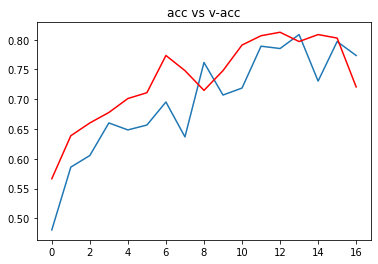

In [30]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

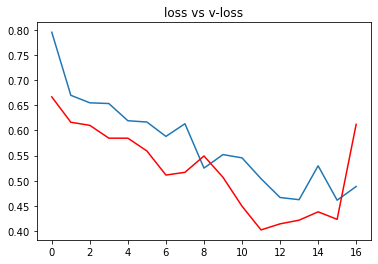

In [31]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [36]:
# path for the image to see if it predics correct class

path = "val/Healthy/Not Cancer  (455).jpg"
img = image.load_img(path, target_size=(224,224),  )

i = image.img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = model.predict_classes(input_arr)[0][0] 



if pred == 0:
  print("The MRI image is of BRAIN TUMOR")
else:
  print("The MRI image is of Healthy brain")

The MRI image is of Healthy brain


# Research Question: How to correctly predict the data with increased accuracy?? 

Each of the models we have experimented on has shown us with how much accuracy it predicts the data. 

##### SVM: 56.09%

##### Decision Tree: 54.89%

##### K-Means: 53.91%

##### K-Nearest Neighbour: 52.82%

##### Random Forest: 52.5%

##### Multi-Layer Perceptron: 50.22%

##### Naive Bayes: 47.83%

From seeing the above models we can say that none of them were actually good enough to predict a tumor. Then we experimented using CNN model which is proof and gave us the highest and the best accuracy of 80.71%. 

##### CNN: 80.71%